In [1]:
import sys
sys.path.append('..')

from common.utility import show_implementation
import matplotlib.pyplot as plt

# Fuzzy Operations

The way we derive fuzzy operations is to first derive the operation on a crisp set. 
Then we extend those operations to the fuzzy set.

## Set Relationship
### Subset
Suppose we have the crisp sets $A = \{2, 3, 4, 5, 6\}$ and $B = \{3, 4\}$, which correspond to the below graph

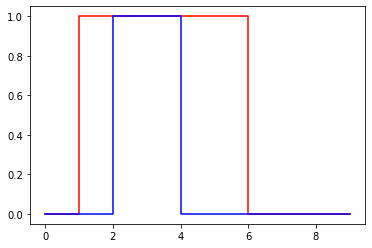

In [2]:
A = [2, 3, 4, 5, 6]
B = [3, 4]

plt.step(range(10) ,[i in A for i in range(10)] , 'r');
plt.step(range(10) ,[i in B for i in range(10)] , 'b');

Here, clearly $B$ is a subset of $A$.

Using this as an inspiration, one possible operation is that $B \subseteq A$ if $\chi_B(x) \leq \chi_A(a)$ for all $x$

Now we extend this to the fuzzy set.

Suppose that our fuzzy sets are as per below

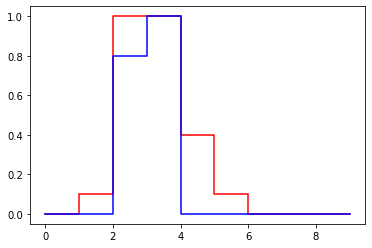

In [3]:
from module.fuzzy_set import DiscreteFuzzySet
A = DiscreteFuzzySet(((0.1, 2), (1, 3), (1, 4), (0.4, 5), (0.1, 6)))
B = DiscreteFuzzySet(((0.8, 3), (1, 4)))

plt.step(range(10) ,[A.get_grade(i) for i in range(10)] , 'r');
plt.step(range(10) ,[B.get_grade(i) for i in range(10)] , 'b');

Since $\mu_B(x) \leq \mu_A(x)$ for all $x$, we can say that $B \subseteq A$ for the fuzzy sets.

### Complement

Suppose we have the crisp sets $A = \{2, 3, 4, 5, 6\}$ again.

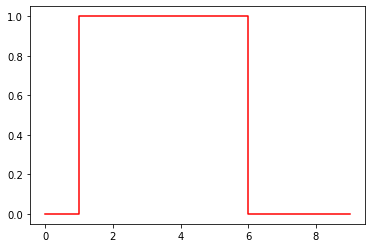

In [4]:
A = [2, 3, 4, 5, 6]

plt.step(range(10) ,[i in A for i in range(10)] , 'r');

If we wish to find the complement of the set, we would be finding the value of $x$ such that $\chi_A(x) = 0$.
This is equivalent to the crisp set with characteristic function of $1-\chi_A(x)$.

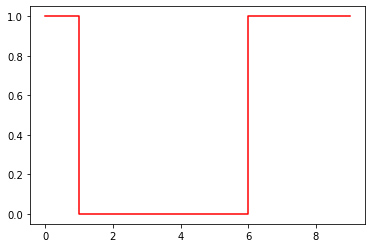

In [5]:
A = [2, 3, 4, 5, 6]

plt.step(range(10) ,[1-(i in A) for i in range(10)] , 'r');

Equivalently, the fuzzy complement of a fuzzy set has the membership function of $1-\mu_A(x)$

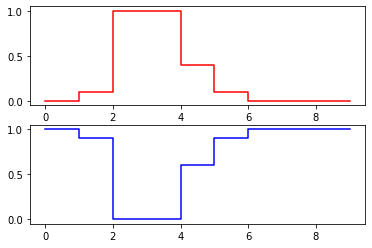

In [6]:
from collections import defaultdict
A = defaultdict(float, {2: 0.1, 3: 1, 4:1, 5: 0.4, 6 :0.1})

_, axs = plt.subplots(2)
axs[0].step(range(10) ,[A[i] if i in A else 0 for i in range(10)] , 'r');
axs[1].step(range(10) ,[1 - (A[i] if i in A else 0) for i in range(10)] , 'b');


#### Complement Conditions
A fuzzy complement must satisfy the following properties

* $c(0) = 1, c(1) = 0$
* For all $\mu_A(x), \mu_A(y)$, if $\mu_A(x) \leq \mu_A(y)$, then $c(\mu_A(x)) \geq c(\mu_A(y))$
* $c$ is continuous
* $c$ is involutive "$c(c(a)) = a$"

Even though $c(a) = 1-a$ is a simple complement, it is not the only one.

For example, the **Sugeno class** is also a fuzzy complement, defined as:

$$
c(a) = \frac{1-a}{1+\lambda a}, \quad \lambda \in (-1, \infty)
$$

#### Equilibrium
The **equilibrium** of a complement is defined as any value of $a$ such that $c(a) = a$.

For example, the equilibrium of $c(a) = 1-a$ is $1-a = a \Rightarrow a = 0.5$

### Union
Suppose we have the crisp sets $A = \{2, 3, 4\}$ and $B = \{3, 4, 5, 6\}$, which correspond to the below graph

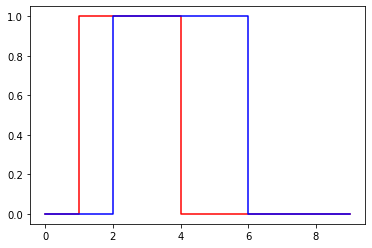

In [7]:
import matplotlib.pyplot as plt

A = [2, 3, 4]
B = [3, 4, 5, 6]

plt.step(range(10) ,[i in A for i in range(10)] , 'r');
plt.step(range(10) ,[i in B for i in range(10)] , 'b');

Suppose we wish to find the union of the two crisp set.
Since we know that $A \cup B = \{2, 3, 4, 5, 6\}$  it is natural to use $max(\chi_A(x), \chi_B(x))$ for membership grade of the union set, which would result in the follow graph.

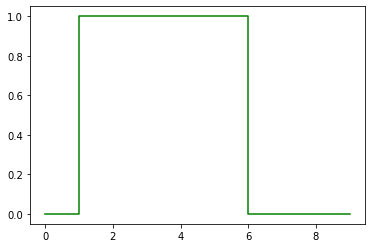

In [8]:
import matplotlib.pyplot as plt

A = [2, 3, 4]
B = [3, 4, 5, 6]

plt.step(range(10) ,[max(i in A, i in B) for i in range(10)] , 'g');

Once again, we extend this to the fuzzy set.

Suppose that our fuzzy sets are as per below

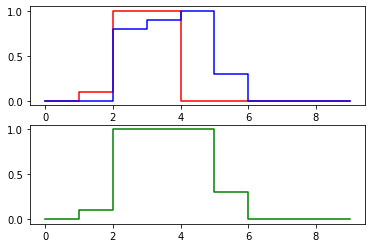

In [9]:
A = DiscreteFuzzySet(((0.1, 2), (1, 3), (1, 4)))
B = DiscreteFuzzySet(((0.8, 3), (0.9, 4), (1, 5), (0.3, 6)))

_, axs = plt.subplots(2)
axs[0].step(range(10) ,[A.get_grade(i) for i in range(10)] , 'r');
axs[0].step(range(10) ,[B.get_grade(i) for i in range(10)] , 'b');
axs[1].step(range(10) ,[A.union(B).get_grade(i) for i in range(10)] , 'g');

#### Union Conditions
A fuzzy union operation must satisfy the following properties

* $u(0,0) = 0, u(1,0) = 1, u(0, 1) = 1, u(1,1) = 1$
* $u(a,b) = u (b,a)$
* If $a' \leq a$ and $b' \leq b$, then $u(a', b') \leq u(a, b)$
* $u(u(a, b), c) = u(a, u(b, c))$

### Intersection
Similarly, for intersection, we would realize that the desired formulation is $\chi_{A \cap B}(x) = max(\chi_A(x), \chi_B(x))$ for all values of $x$.

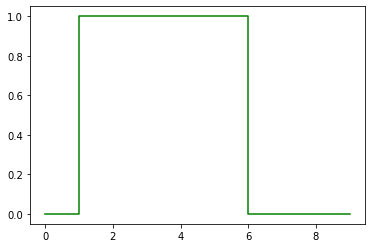

In [10]:
import matplotlib.pyplot as plt

A = [2, 3, 4]
B = [3, 4, 5, 6]

plt.step(range(10) ,[max(i in A, i in B) for i in range(10)] , 'g');


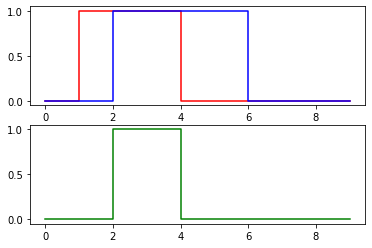

In [11]:
A = [2, 3, 4]
B = [3, 4, 5, 6]

_, axs = plt.subplots(2)
axs[0].step(range(10) ,[i in A for i in range(10)] , 'r');
axs[0].step(range(10) ,[i in B for i in range(10)] , 'b');
axs[1].step(range(10) ,[min(i in A, i in B) for i in range(10)] , 'g');


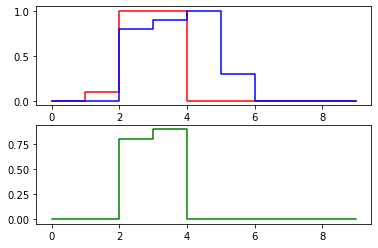

In [12]:
A = DiscreteFuzzySet(((0.1, 2), (1, 3), (1, 4)))
B = DiscreteFuzzySet(((0.8, 3), (0.9, 4), (1, 5), (0.3, 6)))

_, axs = plt.subplots(2)
axs[0].step(range(10) ,[A.get_grade(i) for i in range(10)] , 'r');
axs[0].step(range(10) ,[B.get_grade(i) for i in range(10)] , 'b');
axs[1].step(range(10) ,[A.intersection(B).get_grade(i) for i in range(10)] , 'g');

#### Intersection Conditions
A fuzzy intersection operation must satisfy the following properties

* $i(0,0) = 0, i(1,0) = 0, i(0, 1) = 0, i(1,1) = 1$
* $i(a,b) = i(b,a)$
* If $a' \leq a$ and $b' \leq b$, then $i(a', b') \leq i(a, b)$
* $i(i(a, b), c) = i(a, i(b, c))$

Below is the implementation of the operations on fuzzy set.
Note that complement is not implemented, because it will result in an infinite fuzzy set, which have rather many intricacies to handle.

In [13]:
show_implementation(DiscreteFuzzySet, 'Section 2')

class DiscreteFuzzySet(FuzzySet):

    """Section 2: Operations"""
            
    def union(self, other):
        values = set(self.membership_dict.keys())
        values.update(other.membership_dict.keys())
        return DiscreteFuzzySet([(max(self.membership_dict[val], other.membership_dict[val]), val) for val in values])
    
    def intersection(self, other):
        values = set(self.membership_dict.keys())
        values.update(other.membership_dict.keys())
        return DiscreteFuzzySet([(min(self.membership_dict[val], other.membership_dict[val]), val) for val in values])
   


## Alpha Cut
**Definition**: An $\alpha$-cut ($A_\alpha$) of a **fuzzy set** $A$ is a **crisp set** that contains all elements in the universal set $X$ that has a membership grade in $A$ that is greater or equals to $\alpha$.

Formally, this is defined as:

$$A_\alpha = \{x \in X | \mu_A(x) \geq \alpha\}$$

---

A **strong $\alpha$-cut** ($A_{\alpha^+}$) is one where the  membership grade in $A$ that is strictly greater than $\alpha$. 

Formally, this is defined as:

$$A_\alpha = \{x \in X | \mu_A(x) > \alpha\}$$


For instance, consider the following fuzzy set:
$$
0.8/3 + 0.9/4 + 1/5 + 0.3/6
$$

The $\alpha$-cut when $\alpha = 0.8$ ($A_{\alpha=0.8}$) is $\{3, 4, 5\}$, while the strong $\alpha$-cut of $0.8$ is $\{4, 5\}$

In particular for any fuzzy set $A$:
* $A_{\alpha=0} = X$
* $A_{\alpha^+=0} = Supp(A)$
* $A_{\alpha=1} = Core(A)$
* $A_{\alpha^+=1} = \emptyset$

In [14]:
A = DiscreteFuzzySet.from_string('0.8/3+0.9/4+1/5+0.3/6')
print(A.alpha_cut(0.8))
print(A.strong_alpha_cut(0.85))

[3, 4, 5]
[4, 5]


## Level Set
**Definition:** The **level set** ($\Lambda_A$) is the set of all levels $\alpha \in [0, 1]$ that represents all distinct $\alpha$-cut of $A$.

Formally, it is defined as :

$$\Lambda_A = \{\alpha | \mu_A(x) = \alpha \text{ for some } x \in X\}$$

Thus, for 
$$
A = 0.8/2 + 0.8/3 + 0.9/4 + 1/5 + 0.3/6 + 0.3/7 + 1/8
$$

$$
\Lambda_A =\{0.3, 0.8, 0.9, 1\}
$$

In [15]:
A = DiscreteFuzzySet.from_string('0.8/2+0.8/3+0.9/4+1/5+0.3/6+0.3/7+1/8')

print(A.level_set)

[0.3, 0.8, 0.9, 1.0]


Below is the implementation of the cuts on fuzzy set.

In [16]:
show_implementation(DiscreteFuzzySet, 'Section 3')

class DiscreteFuzzySet(FuzzySet):

    """Section 3: Cuts"""
    def alpha_cut(self, grade):
        return [v for v, g in zip(self.values, self.grades) if g >= grade]

    def strong_alpha_cut(self, grade):
        return [v for v, g in zip(self.values, self.grades) if g > grade]

    @property
    def level_set(self):
        return sorted(set(self.grades))



### <div id='decomposition-theorem'>Decomposition Theorem</div> 
A fuzzy set $A$ can be written as a union of crisp sets as follow:

$$
A = \bigcup_{\alpha \in [0,1]} \alpha (A_\alpha)
$$

For instance, consider the previous fuzzy set:
$$
0.8/3 + 0.9/4 + 1/5 + 0.3/6
$$

We can decompose it into the following fuzzy sets:

$$
\begin{align}
A_{0.3} = 1/3 + 1/4 + 1/5 + 1/6\\
A_{0.8} = 1/3 + 1/4 + 1/5 + 0/6\\
A_{0.9} = 0/3 + 1/4 + 1/5 + 0/6\\
A_{1} = 0/3 + 0/4 + 1/5 + 0/6\\
\end{align}
$$

And thus, 

$$
A = 0.3 A_{0.3} \cup 0.8 A_{0.8} \cup 0.9 A_{0.9} \cup A_{1}
$$

The usefulness of the decomposition theorem is that we can decompose any fuzzy set into a union of crisp sets, then perform crisp set operations on it, and recover our desired fuzzy set by the union of the resultant crisp sets.